<a href="https://colab.research.google.com/github/vrao1/AI-ML/blob/main/TensorFlow/Sales_Forecast_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

Mounting Google Drive to access **datasets** **bold text**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def loadDataframe():
  train_df = pd.read_csv('/content/drive/MyDrive/DatasetsForGoogleColabWork/TensorFlow/SalesForcast/weekly_sales.csv')
  features_df = pd.read_csv('/content/drive/MyDrive/DatasetsForGoogleColabWork/TensorFlow/SalesForcast/features.csv')
  stores_df = pd.read_csv('/content/drive/MyDrive/DatasetsForGoogleColabWork/TensorFlow/SalesForcast/stores.csv')

  return (train_df, features_df, stores_df)

In [5]:
(t_df, f_df, s_df) = loadDataframe()

In [6]:
print(t_df)

      Store  Dept        Date  Weekly_Sales  IsHoliday
0         1     1  2010-02-05      24924.50      False
1         1     1  2010-02-12      46039.49       True
2         1     1  2010-02-19      41595.55      False
3         1     1  2010-02-26      19403.54      False
4         1     1  2010-03-05      21827.90      False
...     ...   ...         ...           ...        ...
9992      6     8  2010-04-30      47811.70      False
9993      6     8  2010-05-07      46289.02      False
9994      6     8  2010-05-14      46403.86      False
9995      6     8  2010-05-21      46435.02      False
9996      6     8  2010-05-28      47246.38      False

[9997 rows x 5 columns]


In [7]:
print(f_df)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        

In [8]:
print(s_df)

    Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43  

In [9]:
features_columns = f_df.columns

print("All columns of features dataset = {}".format(features_columns))

store_columns = s_df.columns

print("All columns of store dataset = {}".format(store_columns))

weekly_sales_columns = t_df.columns

print("All columns of weekly sales dataset = {}".format(weekly_sales_columns))

All columns of features dataset = Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
All columns of store dataset = Index(['Store', 'Type', 'Size'], dtype='object')
All columns of weekly sales dataset = Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


merging stores and features dataframe on store column

In [10]:
merged_df = f_df.merge(s_df, on='Store')

In [11]:
print(merged_df)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0           NaN        NaN       

Finding columns with NaN values

In [12]:
merged_df_columns = merged_df.columns
merged_df_columns_list = merged_df_columns.tolist()

In [13]:
merged_df_columns_list

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday',
 'Type',
 'Size']

In [14]:
all_na = pd.isna(merged_df)
print(all_na)

      Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0     False  False        False       False       True       True       True   
1     False  False        False       False       True       True       True   
2     False  False        False       False       True       True       True   
3     False  False        False       False       True       True       True   
4     False  False        False       False       True       True       True   
...     ...    ...          ...         ...        ...        ...        ...   
8185  False  False        False       False      False      False      False   
8186  False  False        False       False      False      False      False   
8187  False  False        False       False      False      False      False   
8188  False  False        False       False      False      False      False   
8189  False  False        False       False      False      False      False   

      MarkDown4  MarkDown5    CPI  Unem

In [15]:
na_features = all_na.any()
print(na_features)

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI              True
Unemployment     True
IsHoliday       False
Type            False
Size            False
dtype: bool


Count number of null values for each column

In [16]:
print(len(all_na))

8190


In [17]:
print(sum(all_na['MarkDown1']))

4158


In [18]:
print(sum(all_na['MarkDown2']))

5269


In [19]:
print(sum(all_na['MarkDown3']))

4577


In [20]:
print(sum(all_na['MarkDown4']))

4726


In [21]:
print(sum(all_na['MarkDown5']))

4140


In [22]:
print(sum(all_na['CPI']))

585


In [23]:
print(sum(all_na['Unemployment']))

585


All markdown columns values have more or less 50% of entries are missing or null, hence dropping these columns

In [24]:
merged_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [25]:

all_markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
merged_df = merged_df.drop(columns=all_markdown_columns)

merged_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

CPI and unemployment have 585 << 8190 so we are not dropping. Instead we will fill up or impute their missing values.

Finding na values from these two columns

In [26]:
na_values_cpi = all_na['CPI'].astype(int)

In [27]:
na_values_une = all_na['Unemployment'].astype(int)

In [28]:
na_values_cpi.to_numpy().nonzero()

(array([ 169,  170,  171,  172,  173,  174,  175,  176,  177,  178,  179,
         180,  181,  351,  352,  353,  354,  355,  356,  357,  358,  359,
         360,  361,  362,  363,  533,  534,  535,  536,  537,  538,  539,
         540,  541,  542,  543,  544,  545,  715,  716,  717,  718,  719,
         720,  721,  722,  723,  724,  725,  726,  727,  897,  898,  899,
         900,  901,  902,  903,  904,  905,  906,  907,  908,  909, 1079,
        1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090,
        1091, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
        1271, 1272, 1273, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450,
        1451, 1452, 1453, 1454, 1455, 1625, 1626, 1627, 1628, 1629, 1630,
        1631, 1632, 1633, 1634, 1635, 1636, 1637, 1807, 1808, 1809, 1810,
        1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1989, 1990,
        1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2171, 2172, 2173, 2174, 2175, 

In [29]:
na_values_cpi_indices = na_values_cpi.to_numpy().nonzero()[0]

In [30]:
na_values_une_indices = na_values_une.to_numpy().nonzero()[0]

In [31]:
na_values_une_indices

array([ 169,  170,  171,  172,  173,  174,  175,  176,  177,  178,  179,
        180,  181,  351,  352,  353,  354,  355,  356,  357,  358,  359,
        360,  361,  362,  363,  533,  534,  535,  536,  537,  538,  539,
        540,  541,  542,  543,  544,  545,  715,  716,  717,  718,  719,
        720,  721,  722,  723,  724,  725,  726,  727,  897,  898,  899,
        900,  901,  902,  903,  904,  905,  906,  907,  908,  909, 1079,
       1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090,
       1091, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
       1271, 1272, 1273, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450,
       1451, 1452, 1453, 1454, 1455, 1625, 1626, 1627, 1628, 1629, 1630,
       1631, 1632, 1633, 1634, 1635, 1636, 1637, 1807, 1808, 1809, 1810,
       1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2171, 2172, 2173, 2174, 2175, 2176, 2177, 21

In [32]:
import numpy as np

print(np.array_equal(na_values_cpi_indices, na_values_une_indices))

True


In [33]:
na_indices = na_values_cpi_indices

na_rows = merged_df.iloc[na_indices]
na_rows

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
169,1,2013-05-03,66.66,3.386,NaN,NaN,False,A,151315
170,1,2013-05-10,63.90,3.392,NaN,NaN,False,A,151315
171,1,2013-05-17,69.53,3.454,NaN,NaN,False,A,151315
172,1,2013-05-24,77.19,3.494,NaN,NaN,False,A,151315
173,1,2013-05-31,78.02,3.466,NaN,NaN,False,A,151315
...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False,B,118221


Number of weeks with Missing values

In [34]:
print(na_rows['Date'].unique())

['2013-05-03' '2013-05-10' '2013-05-17' '2013-05-24' '2013-05-31'
 '2013-06-07' '2013-06-14' '2013-06-21' '2013-06-28' '2013-07-05'
 '2013-07-12' '2013-07-19' '2013-07-26']


In [35]:
print(merged_df['Date'].unique()[-13:])

['2013-05-03' '2013-05-10' '2013-05-17' '2013-05-24' '2013-05-31'
 '2013-06-07' '2013-06-14' '2013-06-21' '2013-06-28' '2013-07-05'
 '2013-07-12' '2013-07-19' '2013-07-26']


In [36]:
print(na_rows.groupby('Store').count()['Date'].unique())

[13]


Each store has 13 weeks of null values in CPI and une. Total stores are 45.
So total null values = 13*45 = 485

Since unemployment and consumer index don't vary in next 13 weeks so we can substitute those missing ones with the previous week's value

In [37]:
first_missing_row = na_indices[0]
print(merged_df.iloc[first_missing_row][['Date', 'CPI', 'Unemployment']])
print()

first_nan_row = na_indices[0]-1
print(first_nan_row)
print()

first_nan_row_content = merged_df.iloc[first_nan_row]
print(first_nan_row_content[['Date', 'CPI', 'Unemployment']])
print()

previous_cpi = merged_df.at[first_nan_row, 'CPI']
print(previous_cpi)
print()

previous_une = merged_df.at[first_nan_row, 'Unemployment']
print(previous_une)
print()

Date            2013-05-03
CPI                    NaN
Unemployment           NaN
Name: 169, dtype: object

168

Date            2013-04-26
CPI              225.17016
Unemployment         6.314
Name: 168, dtype: object

225.1701596

6.314



In [38]:
merged_df.at[first_missing_row, 'CPI'] = previous_cpi
merged_df.at[first_missing_row, 'Unemployment'] = previous_une

print(merged_df.iloc[first_missing_row][['Date', 'CPI', 'Unemployment']])

Date            2013-05-03
CPI              225.17016
Unemployment         6.314
Name: 169, dtype: object


In [39]:
for ind in na_indices:
  merged_df.at[ind, 'CPI'] = previous_cpi
  merged_df.at[ind, 'Unemployment'] = previous_une

In [40]:
all_bool = pd.isna(merged_df)
all_bool.any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
IsHoliday       False
Type            False
Size            False
dtype: bool

Merge all tables to make single table

Now each column has not null values

In [52]:
merged_df.columns


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [43]:
t_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [58]:
merged_df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [59]:
common_columns = ['Store', 'Date', 'IsHoliday']
final_df = t_df.merge(merged_df, on=common_columns)
final_df.drop(columns=['Date'])

final_df.columns.tolist()

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Type',
 'Size']

In [60]:
print(final_df['Type'].unique())

['A']


In [47]:
print(final_df['Dept'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 78 77]


In [61]:
total_dept = len(final_df['Dept'].unique())
print(total_dept)

68


In [65]:
final_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [66]:
final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)

In [67]:
final_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [83]:
import matplotlib.pyplot as plt

#plot_df = final_df[['Temperature', 'Weekly_Sales']]
#rounded_temp = plot_df['Temperature'].round(0)
#plot_df_1 = plot_df.groupby(rounded_temp).mean()
#plot_df_1.shape
#plot_df.shape
#plot_df.groupby(rounded_temp).mean()
#plot_df_1.plot.scatter(x='Temperature', y='Weekly_Sales')
#plt.show()

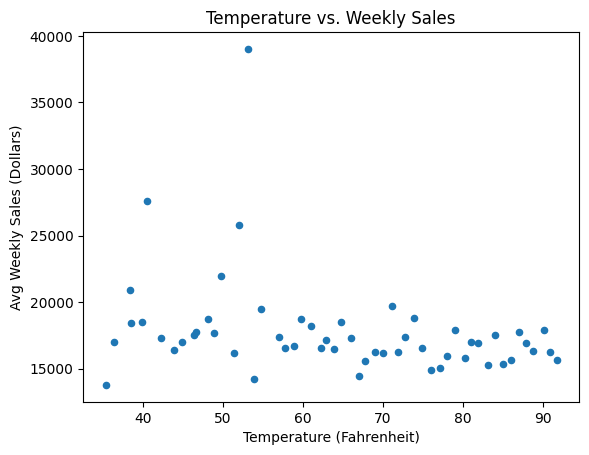

In [89]:


plot_df = final_df[['Temperature', 'Weekly_Sales']]
rounded_temp = plot_df['Temperature'].round(0)
plot_df = plot_df.groupby(rounded_temp).mean()
plot_df.plot.scatter(x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Avg Weekly Sales (Dollars)')
plt.show()
#rounded_temp

In [87]:
final_df[['Temperature', 'Weekly_Sales']]

,Temperature,Weekly_Sales
0,42.31,24924.50
1,42.31,50605.27
2,42.31,13740.12
3,42.31,39954.04
4,42.31,32229.38
...,...,...
9992,85.71,55876.38
9993,85.71,32555.47
9994,85.71,21853.01
9995,85.71,6819.77


In [88]:
plot_df

,Temperature,Weekly_Sales
Temperature,,
35.0,35.400000,13785.351905
36.0,36.390000,17043.155000
38.0,38.370000,20925.354286
39.0,38.594583,18456.716528
40.0,39.977945,18539.745890
41.0,40.580000,27575.420714
42.0,42.290465,17297.006047
44.0,43.911667,16407.880098
45.0,44.937368,16974.729774


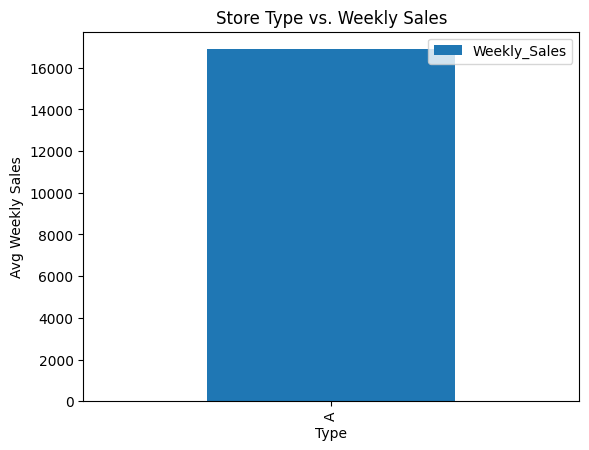

In [91]:
plot_df = final_df[['Weekly_Sales','Type']]
plot_df = plot_df.groupby('Type').mean()
plot_df.plot.bar()
plt.title('Store Type vs. Weekly Sales')
plt.xlabel('Type')
plt.ylabel('Avg Weekly Sales')
plt.show()